In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(train_data, train_labels),_ = mnist.load_data()

In [3]:
train_data = train_data.reshape(len(train_data), 28*28)/255.

In [4]:
ytrain = tf.keras.utils.to_categorical(train_labels)

In [5]:
# add noise
xnoise = np.concatenate((train_data, np.random.random((60000,784))), axis = 1)
# add zeros
xzeros = np.concatenate((train_data, np.zeros(shape = (60000,784))), axis = 1)

In [6]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=512,activation = 'relu'))
    model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
    
    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                 loss = tf.keras.losses.categorical_crossentropy,
                 metrics = ['accuracy'])

    return model

In [7]:
model1 = build_model()
model2 = build_model()

In [8]:
history1 = model1.fit(xnoise, ytrain, epochs=20, batch_size = 512, validation_split = 0.2)
history2 = model2.fit(xzeros, ytrain, epochs=20, batch_size = 512, validation_split = 0.2)

Epoch 1/20
94/94 [==============================] - 2s 10ms/step - loss: 1.0693 - accuracy: 0.6921 - val_loss: 0.4645 - val_accuracy: 0.8442
Epoch 2/20
94/94 [==============================] - 1s 8ms/step - loss: 0.4555 - accuracy: 0.8554 - val_loss: 0.3037 - val_accuracy: 0.9100
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3343 - accuracy: 0.8942 - val_loss: 0.2571 - val_accuracy: 0.9238
Epoch 4/20
94/94 [==============================] - 1s 7ms/step - loss: 0.2546 - accuracy: 0.9196 - val_loss: 0.2409 - val_accuracy: 0.9274
Epoch 5/20
94/94 [==============================] - 1s 7ms/step - loss: 0.2124 - accuracy: 0.9345 - val_loss: 0.2127 - val_accuracy: 0.9332
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.1729 - accuracy: 0.9455 - val_loss: 0.1671 - val_accuracy: 0.9487
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 0.1423 - accuracy: 0.9561 - val_loss: 0.1385 - val_accuracy: 0.9579
Epoch 8/20
94/94 [=

In [9]:
x = np.arange(1,21)

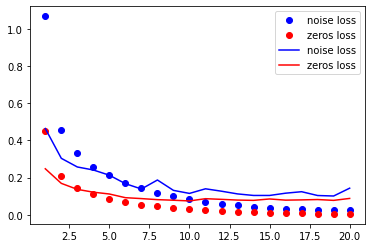

In [14]:
plt.plot(x, history1.history['loss'],'ob',label='noise loss')
plt.plot(x, history2.history['loss'],'or',label='zeros loss')
plt.plot(x, history1.history['val_loss'],'b',label='noise loss')
plt.plot(x, history2.history['val_loss'],'r',label='zeros loss')
plt.legend()
plt.show()

In [ ]:
plt.plot()